In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

This guide uses the Dataset of hourly temperature for Trentino, Italy, from the [Interpol.T](https://CRAN.R-project.org/package=Interpol.T) R package. 

The data loaded here is the dataset `h_d_t` in the package. This is Data frame containing station id, date (yyyy/mm/dd), hour (integer 0,...23), hourly temperature, and a quality flag (not used) in 39 stations in Trentino. In this case, it only contains data for the station `"T0001"`.

In [2]:
data = pd.read_csv("../../static/data/trentino_temperature.csv")
data

,stationid,date,hour,temp,flag
0,T0001,2004/01/01,0,-1.7,1
1,T0001,2004/01/01,1,-1.8,1
2,T0001,2004/01/01,2,-1.8,1
3,T0001,2004/01/01,3,-2.2,1
4,T0001,2004/01/01,4,-3.2,1
...,...,...,...,...,...
17539,T0001,2005/12/31,19,-3.4,1
17540,T0001,2005/12/31,20,-3.3,1
17541,T0001,2005/12/31,21,-3.3,1
17542,T0001,2005/12/31,22,-3.3,1


In [3]:
data["date"] = pd.to_datetime(data["date"])

In [4]:
data_subset = data[(data['date'].dt.year == 2004) & (data['date'].dt.month == 1)]

hour = data_subset["hour"]
day = data_subset["date"].dt.day
temp = data_subset["temp"]
temp = temp.values.reshape(24, len(day.unique()), order="F")

# The first + 1 increases the length, the outer +1 ensures
# the days start at 1, and not at 0.
xgrid = np.arange(day.max() + 1) + 1  # len = 32 

# Hours start at 0, length 25
ygrid = np.arange(25)

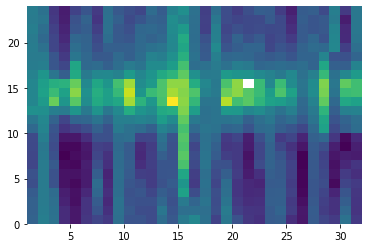

In [5]:
fig, ax = plt.subplots()
ax.pcolormesh(xgrid, ygrid, temp)
ax.set_frame_on(False)

In [6]:
MIN_TEMP = data["temp"].min()
MAX_TEMP = data["temp"].max()

In [7]:
def single_plot(data, month, year, ax):
    data = data[(data["date"].dt.year == year) & (data["date"].dt.month == month)]

    hour = data["hour"]
    day = data["date"].dt.day
    temp = data["temp"]
    temp = temp.values.reshape(24, len(day.unique()), order="F")
    
    xgrid = np.arange(day.max() + 1) + 1
    ygrid = np.arange(25)
    
    ax.pcolormesh(xgrid, ygrid, temp, cmap="magma", vmin=MIN_TEMP, vmax=MAX_TEMP)
    ax.set_ylim(24, 0)
    ax.yaxis.set_ticks([i for i in range(24)])
    ax.xaxis.set_ticks([1, 10, 20, 30])
    ax.yaxis.set_tick_params(length=0)
    ax.xaxis.set_tick_params(length=0)
    ax.set_frame_on(False)

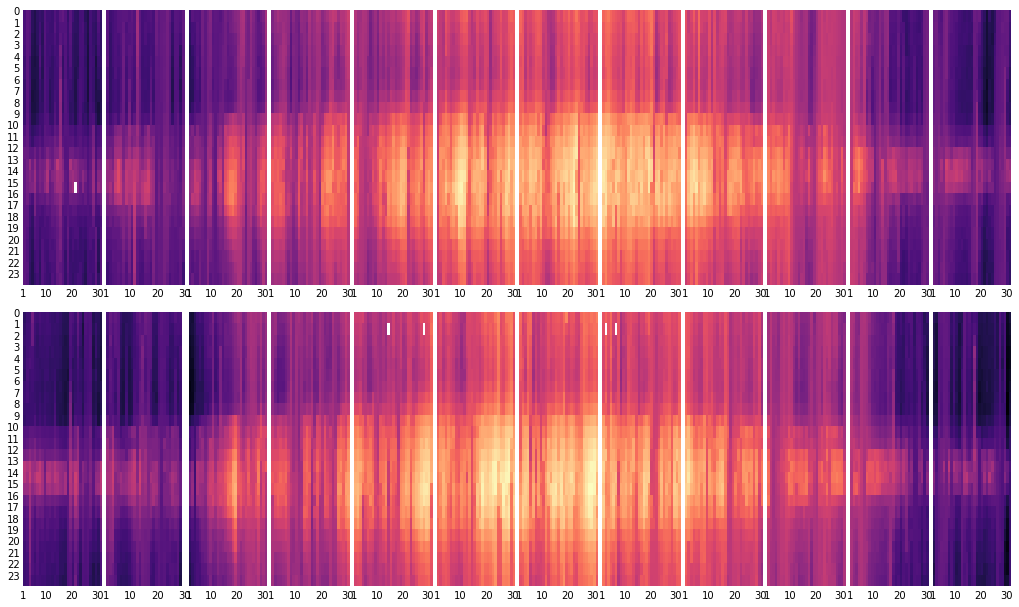

In [8]:
fig, axes = plt.subplots(2, 12, figsize=(14, 10), sharey=True)

for i, year in enumerate([2004, 2005]):
    for j, month in enumerate(range(1, 13)):
        single_plot(data, month, year, axes[i, j])

fig.subplots_adjust(left=0.01, bottom=0.1, right=0.99, top=0.9, hspace=0.1, wspace=0.05)